# Modelos predictivos - Ajustes de parámetros

Como hemos mencionado en capítulos anteriores, dentro de los pasos de entrenamiento y evaluación de un modelo predictivo, debemos realizar una partición externa, y, de ser necesario, una partición interna o de validación. 

Algo a tener en cuenta es que **no debemos usar el conjunto de test para ajustar los parámetros de los algoritmos**. Sin embargo, para ajustar dichos parámetros, es preciso evaluar la bondad de los resultados obtenidos tras entrenar un modelo con un set de parámetros. Por esta razón, habitualmente se crea para ello el conjunto de test de validación, el cual se extrae como parte del conjunto de entrenamiento.

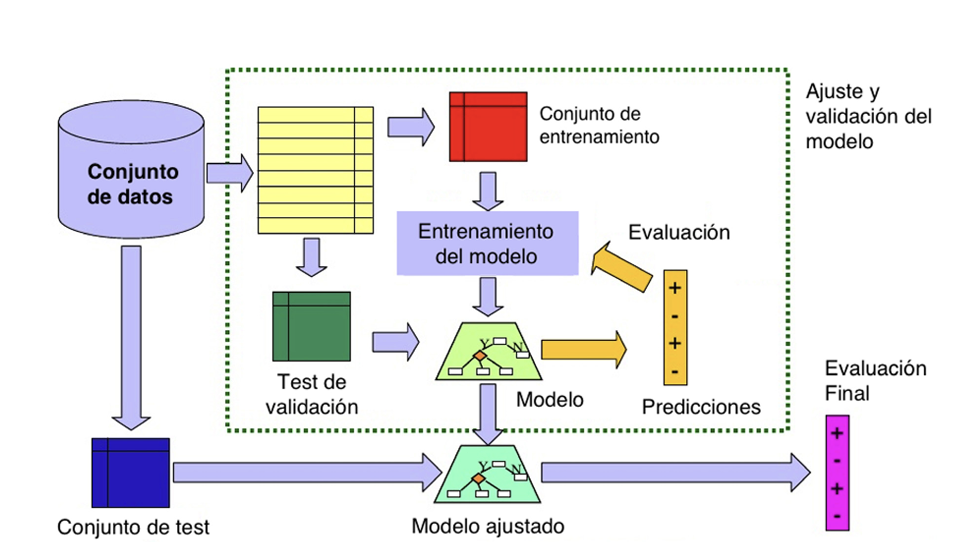

## Evaluación en regresión

En capítulos anteriores hemos definido la métrica `MAE` (Mean absolute error) que se basa en las diferencias en el valor absoluto entre predicciones y valores reales.
Otra métrica utilizada en problemas de regresión es la RMSE que se basa en las diferencias al cuadrado entre predicciones y valores reales.

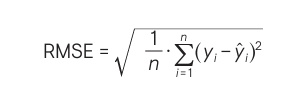

Tal como se aprecia en la definición de `RMSE` (Root mean squared error), las diferencias entre predicciones y valores reales se encuentran elevadas al cuadrado, promediadas, y finalmente calculada su raíz cuadrada. Nótese que, a diferencia de la métrica MAE, en RMSE los mayores errores `(yi-yp)` pesan mucho más en el cómputo de la métrica, pues están elevados al cuadrado

### Ejemplo

Ambas métricas, `MAE` y `RMSE`, pertenecen al conjunto de métricas de evaluación absolutas, pues las desviaciones entre los valores reales y predichos tienen la misma unidad de magnitud que la variable de clase. Por ejemplo, si se tratara de un problema en el que hay que predecir el precio de una vivienda en dólares, aplicamos un algoritmo de aprendizaje de regresión y evaluamos los resultados; los valores de las métricas MAE y RMSE estarían también en dólares.

## Métricas de evaluación relativas
En determinadas ocasiones, necesitamos conocer la magnitud de los errores cometidos de forma relativa al valor real que se predice, esto es, disponer de métricas que nos revelen la proporción (porcentaje o tanto por uno) del valor desviado con respecto al valor real. Se trata de las métricas de evaluación relativas. Entre las más utilizadas, se encuentra la métrica `MAPE` (Mean absolute percentage error), que definimos a continuación.

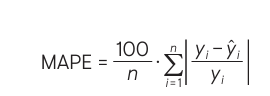



## Ejemplo

En el Programa mostramos un ejemplo de aplicación de las métricas de evaluación de regresión que hemos estudiado. En este ejemplo se ha usado el conjunto de datos `Boston` de regresión, en el que el objetivo es predecir precios de viviendas en la ciudad de Boston.

In [ ]:
import numpy as np
import pandas as pd
from math import sqrt
from pprint import pprint
from sklearn import datasets
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn import preprocessing

### Variables in order:

- CRIM     per capita crime rate by town

- ZN       proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS    proportion of non-retail business acres per town

- CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX      nitric oxides concentration (parts per 10 million)

- RM       average number of rooms per dwelling

- AGE      proportion of owner-occupied units built prior to 1940

- DIS      weighted distances to five Boston employment centres

- RAD      index of accessibility to radial highways

- TAX      full-value property-tax rate per $10,000

- PTRATIO  pupil-teacher ratio by town

- B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT    % lower status of the population

- MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
# Cargar y explorar los datos
datos = pd.read_csv('Boston.csv')
datos.head()

In [ ]:
# Extraer la matriz de datos "X" y la variable target "y"
X = datos.drop(labels='medv', axis=1)
y = datos.medv

In [ ]:
# Partición EXTERNA: hold-out split 80% train - 20% test.
X_training, X_test, y_training, y_test = train_test_split(X, 
                                                          y, 
                                                          test_size=0.2, 
                                                          random_state=42) # el test_size me dice el tamaño del dataset de test, en este caso 20%

In [ ]:
# Estandarización de los datos de entrenamiento y test
standardizer = preprocessing.StandardScaler() #Aplicamos el StandardScaler para poder estandarizar
X_train_std = standardizer.fit_transform(X_training)
X_test_std = standardizer.transform(X_test)

En la variable métricas se construye un diccionario con las métricas que deseamos evaluar. Si bien la métrica `MAE` ya viene definida como `neg_mean_absolute_error` en scikit-learn, las métricas `RMSE` y `MAPE` debemos implementarlas. Para definir las métricas `RMSE` y `MAPE`, hacemos uso de la función `make_scorer()` de `scikit-learn`. Con `make_scorer()` podemos convertir cualquier función en una métrica de evaluación de algoritmos de predicción, siempre que dicha función reciba dos vectores (un vector (`y`) de valores reales y otro (`y_pred`) con las predicciones) y devuelva un valor numérico, que será interpretado como valor de bondad. Hay que tener en cuenta que `scikit-learn` asume por defecto que toda métrica de evaluación genera un número de manera que valores más altos son mejores valores. 

In [ ]:
# Métricas de evaluación.
metricas = {
  'MAE': 'neg_mean_absolute_error',
  'RMSE': make_scorer(lambda y, y_pred:
                      sqrt(mean_squared_error(y, y_pred)),
                      greater_is_better=False),
  'MAPE': make_scorer(lambda y, y_pred:
                      np.mean(np.abs((y - y_pred) / y)) * 100,
                      greater_is_better=False)}

In [ ]:
# Definimos un algoritmo SVM de regresión
alg = SVR(C=10, gamma='auto', kernel='rbf')

En el Programa se ha realizado una validación cruzada con 5 bolsas mediante la función `cross_validate()`.
Esta función, a diferencia de `cross_val_score()`, que hemos usado en ejemplos anteriores, nos
permite indicar no una, sino varias métricas de evaluación. Para ello, usamos el argumento scoring de dicha
función.

In [ ]:
# Validación y evaluación del modelo.
# en "cv = KFold(n_splits=5)" se hace un cross-validation INTERNO!! 
"""
Aquí no utilizamos el cross_val_score, el cross_validate le podes pasar tu diccionario de métricas 
y te devuelve todas las métricas que necesites
"""
results = cross_validate(alg, X_training, y_training, cv = KFold(n_splits=5, 
                                                                 shuffle=True, 
                                                                 random_state=42), scoring = metricas)

In [ ]:
# Presentación de los resultados de la evaluación.
pprint(results)

In [ ]:
# Una vez hemos optimizado los hiperparámetros en el conjunto de validación, entrenamos un nuevo modelo que contenga
# todos los datos de entrenamiento (es decir, train + validation) para evaluar el test
model = SVR(C=10, gamma='scale', kernel='rbf')
model = model.fit(X_training, y_training)

In [ ]:
# Extraemos el error absoluto promedio (MAE) del conjunto de test
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
print('Test results (MAE): ', mae)

In [ ]:
# También podemos extraer las predicciones para cuánto difieren los valores predichos de los reales
print('Predicciones:   ', list(np.round(y_pred[:10], 1)))
print('Valores reales: ', list(y_test[:10]))

In [ ]:
# Grafica de realidad -vs- prediccion.
def grafica_real_vs_pred(y_true, y_pred, metricas, algoritmo):
    fig, ax = plt.subplots()
    ax.scatter(y_true, y_pred, edgecolors=(0, 0, 0))
    ax.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'k--', lw=4)
    ax.set_xlabel('Valor real de la clase')
    ax.set_ylabel('Predicción')
    plt.show()

In [ ]:
grafica_real_vs_pred(y_test, y_pred, metricas, model) #Bisectriz, no es una recta. Los puntos más arriba de la bisectriz significa que estoy sobre estimando, y viceversa.